In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import date

file = open("transaction-data-adhoc-analysis.json")
data = json.load(file)
df = pd.DataFrame(data)
df["transaction_date"] = pd.to_datetime(df["transaction_date"], format = "%Y/%m/%d")
df["transaction_items"] = df["transaction_items"].str.split(";")
df = df.explode("transaction_items").reset_index(drop=True)

df["transaction_items"] = df["transaction_items"].str.split(",")

def product(name): 
    productname = name[1]
    return productname
df["Product"] = df["transaction_items"].apply(product)

def quantity(name): 
    quantity = name[2]
    return quantity
df["Quantity"] = df["transaction_items"].apply(quantity)
df['Quantity'] = df['Quantity'].str.extract('(\d+)', expand=False)
df['Quantity'] = df['Quantity'].astype(int)

df["transaction_items"] = df["transaction_items"].str.join(",")
itemqty = df.groupby([df.transaction_date.dt.month,'Product'])['Quantity'].sum().unstack(level=0)
itemqty.columns = ['January', 'February', 'March', 'April', 'May', 'June']

display(itemqty)

,January,February,March,April,May,June
Product,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Yummy Vegetables,9959,10256,9896,9861,9735,9722


<AxesSubplot:xlabel='Product'>

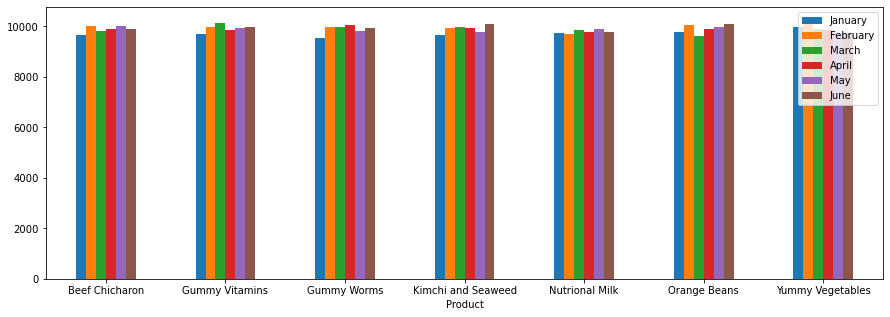

In [22]:
itemqty.plot.bar(rot=0,figsize=(15,5))

In [51]:
newdf = pd.DataFrame(data)
pricelist = newdf[["transaction_items","transaction_value"]].loc[(newdf['transaction_items'].str.contains(";") == False) & (newdf['transaction_items'].str.contains("x1"))].drop_duplicates(subset = ["transaction_items"]).reset_index(drop = True)
pricelist["transaction_items"] = pricelist["transaction_items"].str.split(",")
pricelist["transaction_items"] = pricelist["transaction_items"].apply(product)
pricelist.columns = ['Product', 'Price']
pricelist = pricelist.set_index('Product')
concat = pd.concat([itemqty, pricelist], axis=1)

concat['January'] = concat['January']*concat['Price']
concat['February'] = concat['February']*concat['Price']
concat['March'] = concat['March']*concat['Price']
concat['April'] = concat['April']*concat['Price']
concat['May'] = concat['May']*concat['Price']
concat['June'] = concat['June']*concat['Price']
concat.drop('Price', inplace=True, axis=1)

concat

,January,February,March,April,May,June
Product,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000


<AxesSubplot:xlabel='Product'>

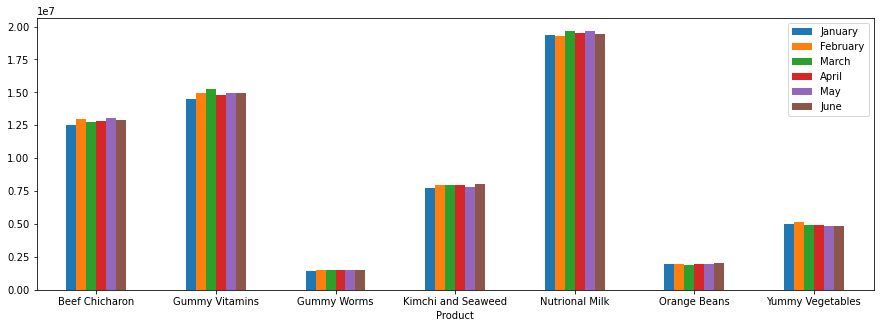

In [52]:
concat.plot.bar(rot=0,figsize=(15,5))

In [89]:
frequency = pd.crosstab(df.name,df.transaction_date.dt.month)
frequency.columns = ['January', 'February', 'March', 'April', 'May', 'June']

repeaters = [0]
repeaters.append(len(frequency.loc[(frequency['January'] != 0) & (frequency['February'] != 0)]))
repeaters.append(len(frequency.loc[(frequency['February'] != 0) & (frequency['March'] != 0)]))
repeaters.append(len(frequency.loc[(frequency['March'] != 0) & (frequency['April'] != 0)]))
repeaters.append(len(frequency.loc[(frequency['April'] != 0) & (frequency['May'] != 0)]))
repeaters.append(len(frequency.loc[(frequency['May'] != 0) & (frequency['June'] != 0)]))

repeatersdata = pd.DataFrame(repeaters,index = ['January', 'February', 'March', 'April', 'May', 'June'], columns=['Repeaters']).transpose()

repeatersdata

,January,February,March,April,May,June
Repeaters,0,5172,5216,5154,5110,5193


In [94]:
inactive = [0]
inactive.append(len(frequency.loc[(frequency['January'] != 0) & (frequency['February'] == 0)]))
inactive.append(len(frequency.loc[((frequency['January'] != 0) | (frequency['February'] != 0)) & (frequency['March'] == 0)]))
inactive.append(len(frequency.loc[((frequency['January'] != 0) | (frequency['February'] != 0) | (frequency['March'] != 0)) & (frequency['April'] == 0)]))
inactive.append(len(frequency.loc[((frequency['January'] != 0) | (frequency['February'] != 0) | (frequency['March'] != 0) | (frequency['April'] != 0)) & (frequency['May'] == 0)]))
inactive.append(len(frequency.loc[((frequency['January'] != 0) | (frequency['February'] != 0) | (frequency['March'] != 0) | (frequency['April'] != 0) | (frequency['May'] != 0)) & (frequency['June'] == 0)]))

inactivedata = pd.DataFrame(inactive,index = ['January', 'February', 'March', 'April', 'May', 'June'], columns=['Inactive']).transpose()

inactivedata

,January,February,March,April,May,June
Inactive,0,1416,1747,1909,1917,1835


In [90]:
engaged = []
engaged.append(len(frequency.loc[(frequency['January'] != 0)]))
engaged.append(len(frequency.loc[(frequency['January'] != 0) & (frequency['February'] != 0)]))
engaged.append(len(frequency.loc[(frequency['January'] != 0) & (frequency['February'] != 0) & (frequency['March'] != 0)]))
engaged.append(len(frequency.loc[(frequency['January'] != 0) & (frequency['February'] != 0) & (frequency['March'] != 0) & (frequency['April'] != 0)]))
engaged.append(len(frequency.loc[(frequency['January'] != 0) & (frequency['February'] != 0) & (frequency['March'] != 0) & (frequency['April'] != 0) & (frequency['May'] != 0)]))
engaged.append(len(frequency.loc[(frequency['January'] != 0) & (frequency['February'] != 0) & (frequency['March'] != 0) & (frequency['April'] != 0) & (frequency['May'] != 0) & (frequency['June'] != 0)]))

engageddata = pd.DataFrame(engaged,index = ['January', 'February', 'March', 'April', 'May', 'June'], columns=['Engaged']).transpose()

engageddata

,January,February,March,April,May,June
Engaged,6588,5172,4126,3289,2667,2190


In [95]:
everything = pd.concat([repeatersdata, inactivedata, engageddata], axis=0)

everything

,January,February,March,April,May,June
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190


<AxesSubplot:>

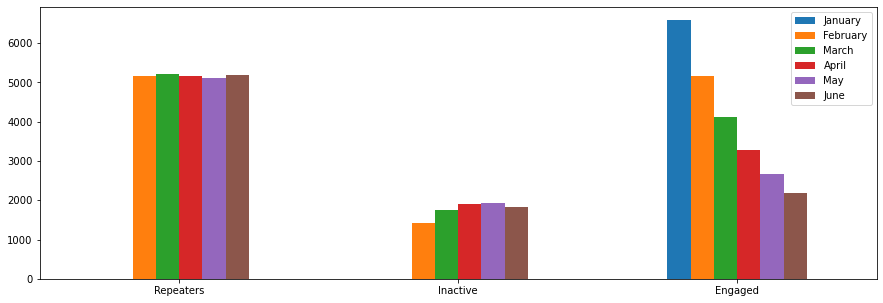

In [96]:
everything.plot.bar(rot=0,figsize=(15,5))